## Judul/Topik : Deteksi Transaksi Keuangan Perbankan Terindikasi Fraud atau Tidak


#### Overview :
#### 1. Lebih memahami pola transaksi yang ada pada dataset "Fraud Dataset Example" dengan melakukan Explorasi Data Analisa (EDA)
#### 2. Melakukan Data Preprocessing, agar data benar-benar dapatkan output yang optimal dari pemodelan
#### 3. Membuat pemodelan dan memilih pemodelan yang terbaik untuk mendeteksi fraud dalam transaksi keuangan di perbankan

#### Dataset Fraud Detection Example

1. step: Satuan waktu dalam jam, yang mewakili ketika transaksi terjadi. Setiap unit step mewakili satu jam.

2. type: Jenis transaksi, bisa berupa CASH-IN (menyetorkan uang), CASH-OUT (mengambil uang), DEBIT (transaksi debit), PAYMENT (pembayaran), dan TRANSFER (transfer antar akun).

3. amount: Jumlah nominal dalam transaksi, diukur dalam mata uang lokal.

4. nameOrig: Originator (pemilik) transaksi, merupakan identifier unik untuk transaksi yang mengidentifikasi siapa yang melakukan transaksi.

5. oldbalanceOrg: Saldo awal pemilik atau pengirim transaksi sebelum transaksi terjadi.

6. newbalanceOrig: Saldo akhir pemilik atau pengirim transaksi setelah transaksi terjadi.

7. nameDest: Penerima transaksi, merupakan identifier unik untuk transaksi yang mengidentifikasi siapa yang menerima transaksi.

8. oldbalanceDest: Saldo awal penerima transaksi sebelum transaksi terjadi.

9. newbalanceDest: Saldo akhir penerima transaksi setelah transaksi terjadi.

10. isFraud: Variabel target yang menunjukkan apakah suatu transaksi terindikasi fraud (1) atau bukan (0).

11. isFlaggedFraud: Menandakan apakah terdapat upaya ilegal untuk mentransfer jumlah uang besar dalam satu transaksi. Jika nilai 1, itu menunjukkan upaya transfer ilegal; jika 0, tidak ada upaya transfer ilegal.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing_id/Materi/Colab Notebooks/Final Project/latihan/Fraud/fraud_dataset_example.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


#### Dataset terdiri dari 11 kolom dan 101613 baris

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


#### Kolom isFlaggedFraud sepertinya semua bernilai 0, yang berarti tidak ada transaksi yang dianggap sebagai kecurangan, dan mungkin kolom ini selanjutanya akan dihapus karena tidak diperlukan dalam pemodelan.

In [ ]:
# Menampilkan frekuensi nilai unik untuk kolom 'step'

print(f"\nFrekuensi nilai unik untuk {'step'}:\n{df['step'].value_counts()}")


Frekuensi nilai unik untuk step:
9     37628
10    28887
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: step, dtype: int64


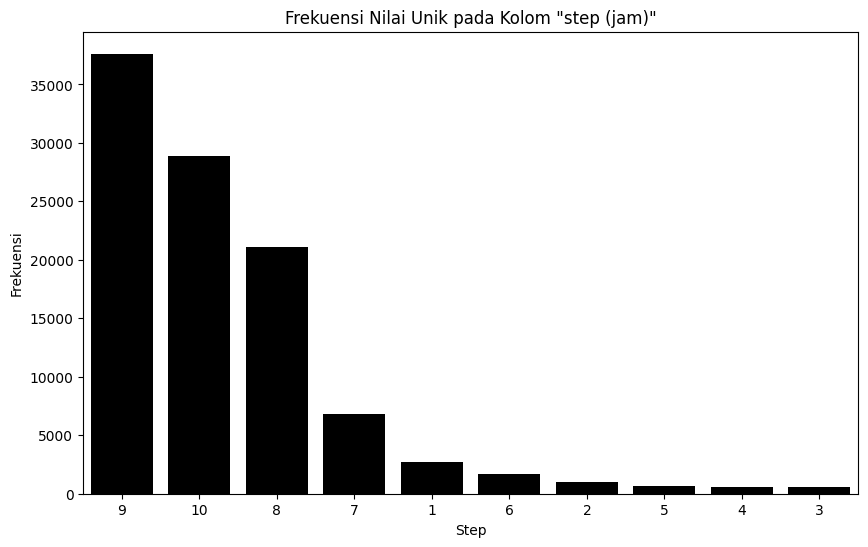

In [ ]:
# Visualisasinya

step_counts = df['step'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=step_counts.index, y=step_counts.values, order=step_counts.index, color='black')
plt.title('Frekuensi Nilai Unik pada Kolom "step (jam)"')
plt.xlabel('Step')
plt.ylabel('Frekuensi')
plt.show()

#### Step (jam) ke-9 memiliki frekuensi transaksi tertinggi.

In [ ]:
# Jumlah transaksi terindikasi Fraud berdasarkan 'step'

fraud_by_step = df.groupby('step')['isFraud'].sum().reset_index()
fraud_by_step

,step,isFraud
0,1,16
1,2,8
2,3,4
3,4,10
4,5,6
5,6,22
6,7,12
7,8,12
8,9,19
9,10,7


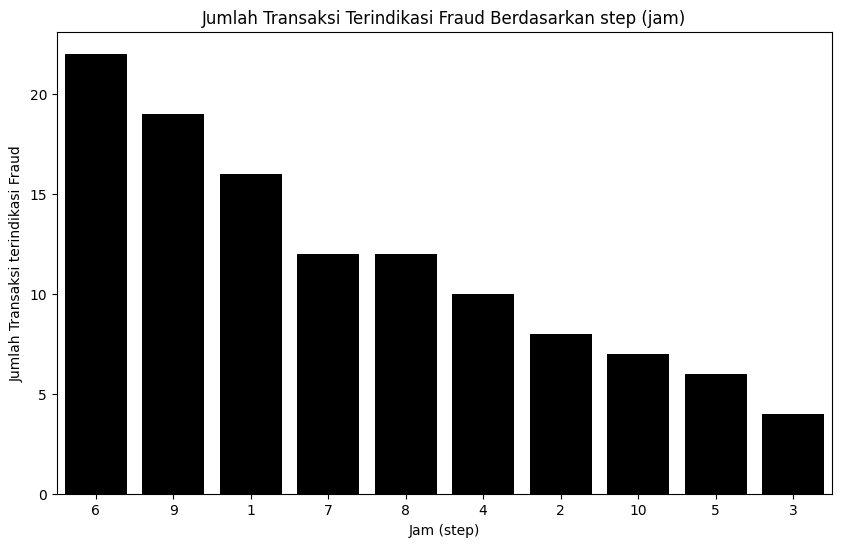

In [ ]:
# Visualisasinya

fraud_by_step_sorted = fraud_by_step.sort_values(by='isFraud', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='step', y='isFraud', data=fraud_by_step_sorted, color='black', order=fraud_by_step_sorted['step'])
plt.title('Jumlah Transaksi Terindikasi Fraud Berdasarkan step (jam)')
plt.xlabel('Jam (step)')
plt.ylabel('Jumlah Transaksi terindikasi Fraud')
plt.show()

#### Step (jam) ke-6 memiliki aktivitas transaksi yg terindikasi Fraud sebanyak 22 transaksi merupakan yg tertinggi dari 10 step yg ada dalam dataset, dimana step ke-6 hanya memiliki aktivitas transaksi sebesar 1660 jauh lebih kecil jika dibandingkan dengan step ke-9 yg memiliki aktivitas transaksi sebesar 37628 dengan aktivitas transaksi yg terindikasi Fraud sebesar 19. Jadi disini dapat disimpulkan step dengan aktivitas transaksi yg tinggi belum tentu mengandung aktivitas transaksi yg terindikasi Fraud juga tinggi

In [ ]:
# Menampilkan frekuensi nilai unik untuk kolom 'type'

print(f"\nFrekuensi nilai unik untuk {'type'}:\n{df['type'].value_counts()}")


Frekuensi nilai unik untuk type:
PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: type, dtype: int64


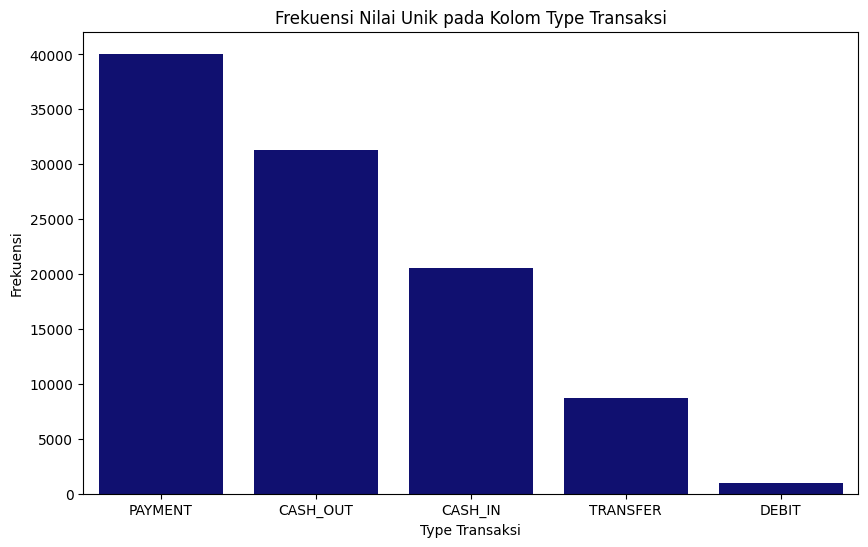

In [ ]:
# Visualisasinya

step_counts = df['type'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=step_counts.index, y=step_counts.values, color='navy')
plt.title('Frekuensi Nilai Unik pada Kolom Type Transaksi')
plt.xlabel('Type Transaksi')
plt.ylabel('Frekuensi')
plt.show()

#### Tipe transaksi payment, cash-out dan cash-in merupakan jenis transaksi yang paling sering digunakan

In [ ]:
# Jumlah transaksi yang terindikasi Fraud berdasarkan 'type'

fraud_by_type = df.groupby('type')['isFraud'].sum().reset_index()
fraud_by_type

,type,isFraud
0,CASH_IN,0
1,CASH_OUT,59
2,DEBIT,0
3,PAYMENT,0
4,TRANSFER,57


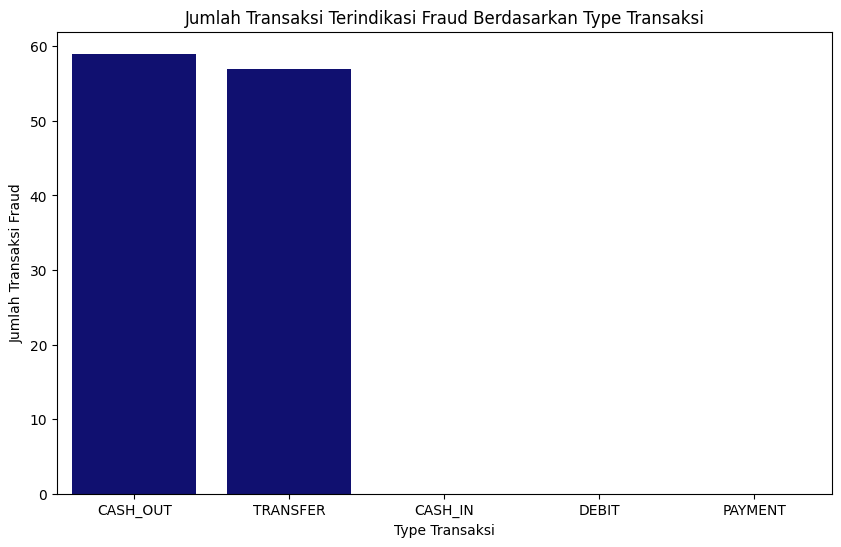

In [ ]:
# Visualisasinya

fraud_by_type_sorted = fraud_by_type.sort_values(by='isFraud', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='isFraud', data=fraud_by_type_sorted, color='navy', order=fraud_by_type_sorted['type'])
plt.title('Jumlah Transaksi Terindikasi Fraud Berdasarkan Type Transaksi')
plt.xlabel('Type Transaksi')
plt.ylabel('Jumlah Transaksi Fraud')
plt.show()

#### Type transaski cash-out memiliki aktivitas transaksi yg terindikasi Fraud tertinggi, padahal transaksi cash-out memiliki aktivitas transaksi lebih rendah dari payment, jadi dapat disimpulkan type transaksi yg memiliki aktivitas transaksi yg tinggi belum tentu terindikasi memiliki transaksi yg Fraud

#### Melihat hubungan 'step' dan 'type' jika dihubungkan dengan transaksi yg Fraud atau tidak

In [ ]:
# Jumlah Transaksi yg Terindikasi Fraud Berdasarkan Type Transaksi dan Waktunya

pivot_table = pd.pivot_table(df, values='isFraud', index='step', columns='type', aggfunc='sum', fill_value=0)
pivot_table

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,,,,,
1,0,9,0,0,7
2,0,4,0,0,4
3,0,2,0,0,2
4,0,5,0,0,5
5,0,3,0,0,3
6,0,11,0,0,11
7,0,6,0,0,6
8,0,6,0,0,6
9,0,9,0,0,10


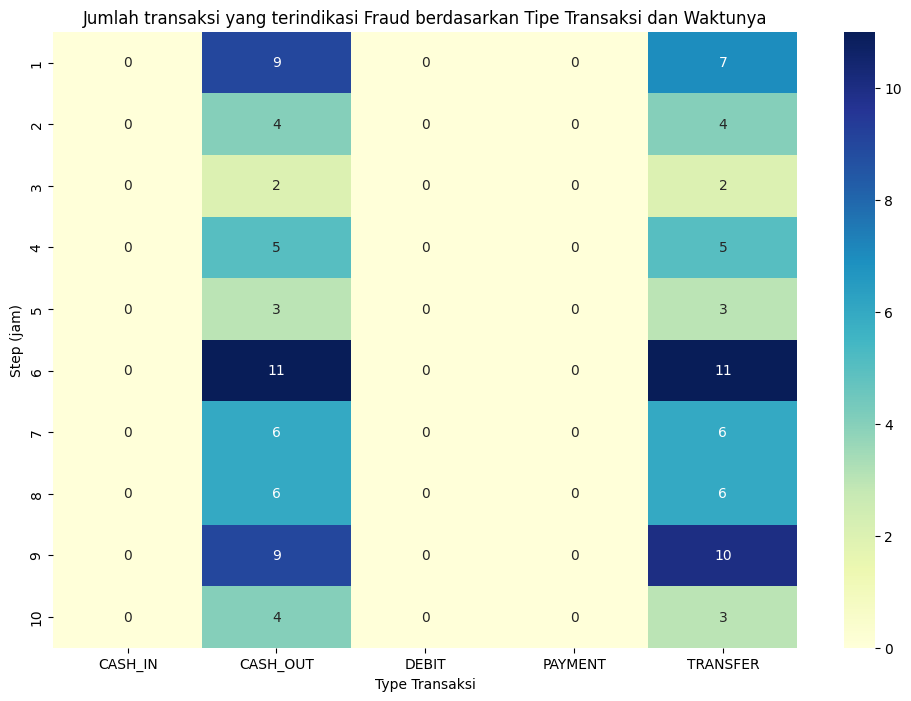

In [ ]:
# Visualisasinya

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Jumlah transaksi yang terindikasi Fraud berdasarkan Tipe Transaksi dan Waktunya')
plt.xlabel('Type Transaksi')
plt.ylabel('Step (jam)')
plt.show()

#### Transaksi yang terindikasi Fraud tertinggi terjadi pada transaksi cash-out dan transfer dengan dengan waktu di jam ke-6

In [ ]:
# Menampilkan frekuensi nilai unik untuk kolom 'amount'

print(f"\nFrekuensi nilai unik untuk {'amount'}:\n{df['amount'].value_counts()}")


Frekuensi nilai unik untuk amount:
2475.13      3
6285.19      3
25975.86     3
89631.24     3
17320.91     3
            ..
3079.21      1
11902.12     1
189488.41    1
153406.42    1
469539.21    1
Name: amount, Length: 101069, dtype: int64


<ipython-input-67-351e897e9847>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="type", y="amount", hue="isFraud", data=df, ci=None)


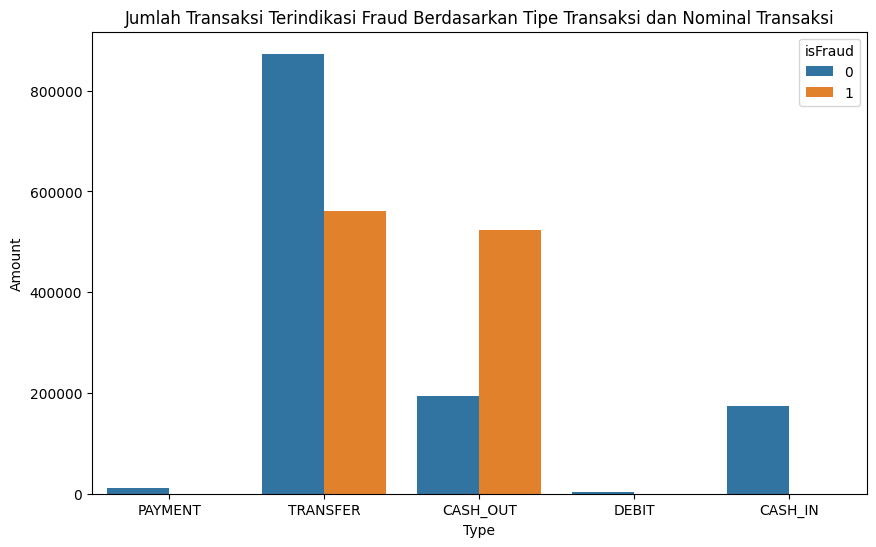

In [ ]:
# Visualisasi kolom 'amount' berdasarkan kolom 'type' dan 'isFraud'

plt.figure(figsize=(10, 6))
sns.barplot(x="type", y="amount", hue="isFraud", data=df, ci=None)
plt.title('Jumlah Transaksi Terindikasi Fraud Berdasarkan Tipe Transaksi dan Nominal Transaksi')
plt.xlabel('Type')
plt.ylabel('Amount')
plt.show()

### Transaksi yg terindikasi Fraud bertipe Transfer dan Cash-out dengan nominal transaksi dibawah 600000

<ipython-input-68-bbc032202dad>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="step", y="amount", hue="isFraud", data=df, ci=None)


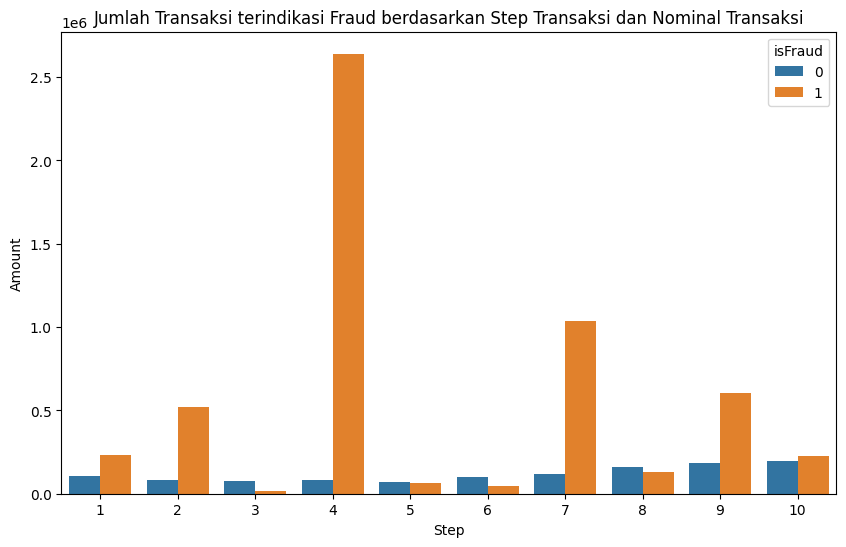

In [ ]:
# Visualisasi kolom 'amount' berdasarkan kolom 'step' dan 'isFraud'

plt.figure(figsize=(10, 6))
sns.barplot(x="step", y="amount", hue="isFraud", data=df, ci=None)
plt.title('Jumlah Transaksi terindikasi Fraud berdasarkan Step Transaksi dan Nominal Transaksi')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()

#### Transaksi yg terindikasi Fraud tertinggi yaitu transaksi pada step (jam) ke-4 dengan nilai transaksi diatas 2500000

In [ ]:
# Menampilkan frekuensi nilai unik untuk kolom 'nameOrig' dan 'nameDest'

print(f"\nFrekuensi nilai unik untuk {'nameOrig'}:\n{df['nameOrig'].value_counts()}")
print(f"\nFrekuensi nilai unik untuk {'nameDest'}:\n{df['nameDest'].value_counts()}")


Frekuensi nilai unik untuk nameOrig:
C1231006815    1
C358333738     1
C917141406     1
C1797964264    1
C59265825      1
              ..
C1647349751    1
C843142567     1
C1860747846    1
C754172061     1
C515691325     1
Name: nameOrig, Length: 101613, dtype: int64

Frekuensi nilai unik untuk nameDest:
C985934102     78
C1286084959    72
C248609774     71
C1590550415    70
C2083562754    66
               ..
M1555760964     1
M338533290      1
M1786033562     1
M1947241909     1
M334249577      1
Name: nameDest, Length: 52280, dtype: int64


In [ ]:
# Eksplorasi distribusi nilai nameOrig
print(df['nameOrig'].describe())

# Eksplorasi distribusi nilai nameDest
print(df['nameDest'].describe())

count          101613
unique         101613
top       C1231006815
freq                1
Name: nameOrig, dtype: object
count         101613
unique         52280
top       C985934102
freq              78
Name: nameDest, dtype: object


#### Setiap nama akun pemilik/pengirim transaksi hanya muncul sekali terliha tidak ada nama pemiliki akun yg lebih aktif dari pemilik akun yang lain.
#### Untuk nama akun penerima ada beberapa yg muncul lebih dari satu kali, nama akun 'C985934102' muncul sebanyak 78 kali, akan kita lihat hubungannya dengan variabel target isFraud.

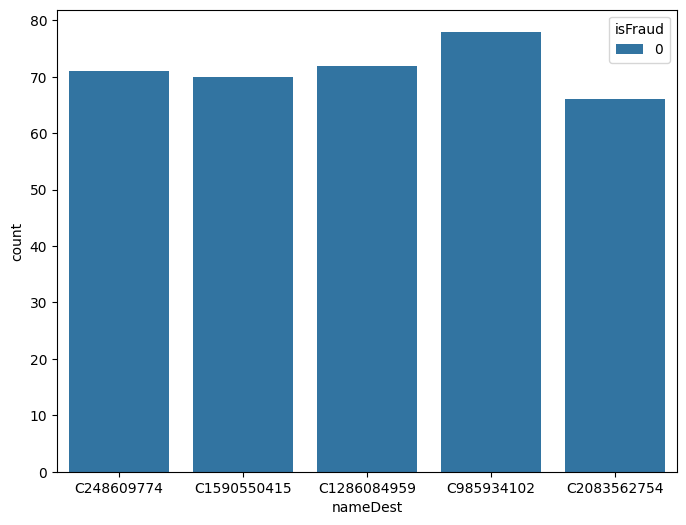

In [ ]:
# Visualisasi hubungan nama akun penerima yg paling sering muncul dengan 'isFraud'

plt.figure(figsize=(8, 6))
sns.countplot(x='nameDest', hue='isFraud', data=df[df['nameDest'].isin(['C985934102', 'C1286084959', 'C248609774', 'C1590550415', 'C2083562754'])])
plt.show()

#### Untuk nama akun penerima yg muncul lebih dari satu kali dengan frekuensi tertinggi semuanya tidak terindikasi pada transaksi Fraud.

#### Jadi kesimpulannya nama akun pemilik/pengirim dan nama akun penerima akan dihapus karena hanya berfungsi sebagai identifikasi nama akun dan tidak memberi informasi yang relevan terhadap deteksi transaksi yg terindikasi Fraud.





In [ ]:
fraud_stats = df[df['isFraud'] == 1][['oldbalanceOrg', 'newbalanceOrig']].mean()
non_fraud_stats = df[df['isFraud'] == 0][['oldbalanceOrg', 'newbalanceOrig']].mean()

print('Fraud Statistics:')
print(fraud_stats)

print('\nNon-Fraud Statistics:')
print(non_fraud_stats)

Fraud Statistics:
oldbalanceOrg     552710.135086
newbalanceOrig     29080.483707
dtype: float64

Non-Fraud Statistics:
oldbalanceOrg     907580.371543
newbalanceOrig    924521.470543
dtype: float64


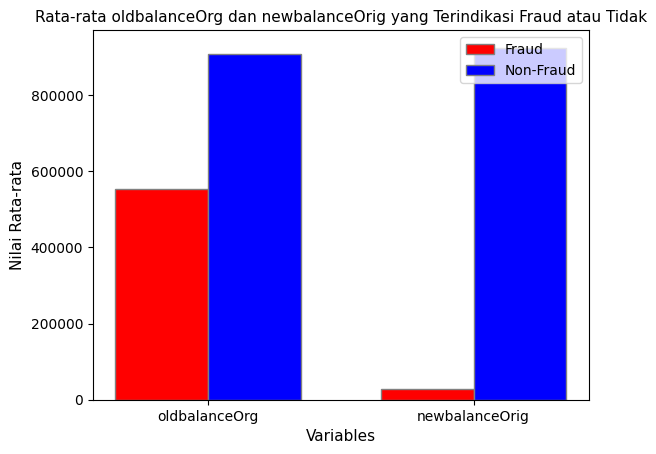

In [ ]:
# Statistik Fraud
fraud_stats = {
    'oldbalanceOrg': [552710.135086],
    'newbalanceOrig': [29080.483707]
}

# Statistik Non-Fraud
non_fraud_stats = {
    'oldbalanceOrg': [907580.371543],
    'newbalanceOrig': [924521.470543]
}

# Menyiapkan data untuk plot
categories = list(fraud_stats.keys())
fraud_mean = fraud_stats['oldbalanceOrg'] + fraud_stats['newbalanceOrig']
non_fraud_mean = non_fraud_stats['oldbalanceOrg'] + non_fraud_stats['newbalanceOrig']

# Menyiapkan plot
barWidth = 0.35
r1 = range(len(categories))
r2 = [x + barWidth for x in r1]

# Membuat plot
plt.bar(r1, fraud_mean, color='red', width=barWidth, edgecolor='grey', label='Fraud')
plt.bar(r2, non_fraud_mean, color='blue', width=barWidth, edgecolor='grey', label='Non-Fraud')

# Menambahkan label dan judul
plt.xlabel('Variables', fontsize=11)
plt.xticks([r + barWidth/2 for r in range(len(categories))], categories)
plt.ylabel('Nilai Rata-rata', fontsize=11)
plt.title('Rata-rata oldbalanceOrg dan newbalanceOrig yang Terindikasi Fraud atau Tidak', fontsize=11)
plt.legend()
plt.show()

#### Rata-rata saldo awal pemilik/pengirim yg terindikasi Fraud lebih tinggi dibangdingkan dengan saldo akhir -nya.

In [ ]:
fraud_stats = df[df['isFraud'] == 1][['oldbalanceDest', 'newbalanceOrig']].mean()
non_fraud_stats = df[df['isFraud'] == 0][['oldbalanceDest', 'newbalanceOrig']].mean()

print('Fraud Statistics:')
print(fraud_stats)

print('\nNon-Fraud Statistics:')
print(non_fraud_stats)

Fraud Statistics:
oldbalanceDest    227348.217328
newbalanceOrig     29080.483707
dtype: float64

Non-Fraud Statistics:
oldbalanceDest    881789.899031
newbalanceOrig    924521.470543
dtype: float64


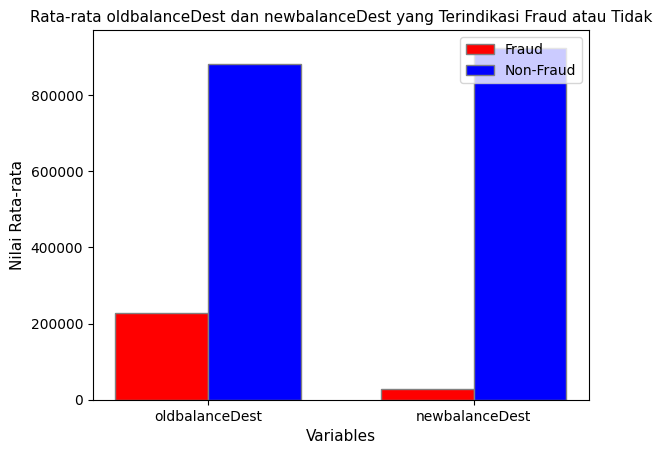

In [ ]:
# Statistik Fraud
fraud_stats = {
    'oldbalanceDest': [227348.217328],
    'newbalanceDest': [29080.483707]
}

# Statistik Non-Fraud
non_fraud_stats = {
    'oldbalanceDest': [881789.899031],
    'newbalanceDest': [924521.470543]
}

# Menyiapkan data untuk plot
categories = list(fraud_stats.keys())
fraud_mean = fraud_stats['oldbalanceDest'] + fraud_stats['newbalanceDest']
non_fraud_mean = non_fraud_stats['oldbalanceDest'] + non_fraud_stats['newbalanceDest']

# Menyiapkan plot
barWidth = 0.35
r1 = range(len(categories))
r2 = [x + barWidth for x in r1]

# Membuat plot
plt.bar(r1, fraud_mean, color='red', width=barWidth, edgecolor='grey', label='Fraud')
plt.bar(r2, non_fraud_mean, color='blue', width=barWidth, edgecolor='grey', label='Non-Fraud')

# Menambahkan label dan judul
plt.xlabel('Variables', fontsize=11)
plt.xticks([r + barWidth/2 for r in range(len(categories))], categories)
plt.ylabel('Nilai Rata-rata', fontsize=11)
plt.title('Rata-rata oldbalanceDest dan newbalanceDest yang Terindikasi Fraud atau Tidak', fontsize=11)
plt.legend()

# Menampilkan plot
plt.show()

#### Rata-rata saldo awal penerima terindikasi transaksi Fraud lebih tinggi dibangdingkan dengan saldo akhir -nya.

In [ ]:
# Menampilkan frekuensi nilai unik untuk Target Variabel 'isFraud'

print(f"\nFrekuensi nilai unik untuk {'isFraud'}:\n{df['isFraud'].value_counts()}")


Frekuensi nilai unik untuk isFraud:
0    101497
1       116
Name: isFraud, dtype: int64


0    101497
1       116
Name: isFraud, dtype: int64


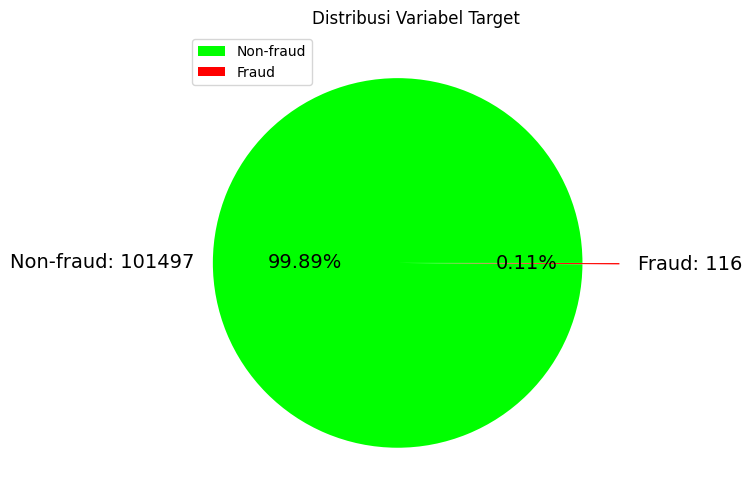

In [ ]:
# Distribusi variabel target 'isFraud'

print(df['isFraud'].value_counts())

pie, ax = plt.subplots(figsize=[10, 6])
labels = ['Non-fraud', 'Fraud']
colors = ['lime', 'red']
explode = [0.1, 0.1]  # Adjust the explode values to control chart size
wedges, texts, autotexts = plt.pie(x=df['isFraud'].value_counts(), autopct='%.2f%%', explode=explode, labels=labels,
                                   pctdistance=0.5, textprops={'fontsize': 14}, colors=colors)

plt.title('Distribusi Variabel Target')

# Add legend
plt.legend(labels, loc="upper left", fontsize='medium')

# Add numeric values and percentages inside each slice
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    text.set_text(f'{labels[i]}: {df["isFraud"].value_counts()[i]}')
    autotext.set_text(f'{df["isFraud"].value_counts(normalize=True)[i]*100:.2f}%')

plt.show()

#### Target variabel sangat tidak seimbang (imbalance) antara kelas non-Fraud dan Fraud, pada kasus ini  metrik evaluasi yg digunakan yaitu F1-score, karena F1-score memberikan gambaran yang lebih baik tentang kinerja model di tengah ketidakseimbangan, disamping itu F1-score mengambil nilai rata-rata dari Precision dan Recall, dan juga F1-score dapat mengidentifikasi model yang baik secara keseluruhan dalam menangani False Positives dan False Negatives.

In [ ]:
# Menampilkan frekuensi nilai unik untuk kolom 'isFlaggedFraud'

print(f"\nFrekuensi nilai unik untuk {'isFlaggedFraud'}:\n{df['isFlaggedFraud'].value_counts()}")


Frekuensi nilai unik untuk isFlaggedFraud:
0    101613
Name: isFlaggedFraud, dtype: int64


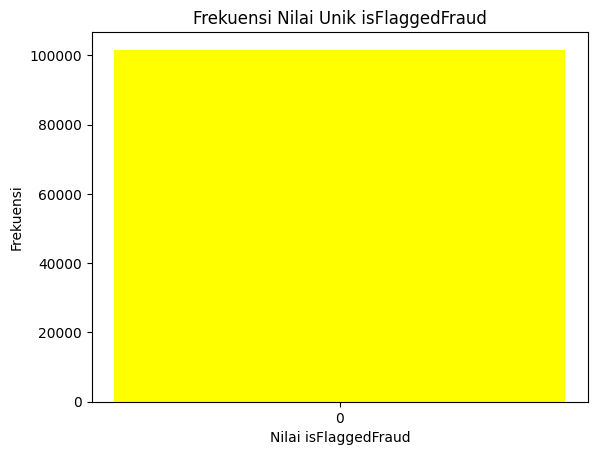

In [ ]:
# Visualisasinya

# Data
values = [101613]
labels = ['0']

plt.bar(labels, values, color='yellow')
plt.title('Frekuensi Nilai Unik isFlaggedFraud')
plt.xlabel('Nilai isFlaggedFraud')
plt.ylabel('Frekuensi')
plt.show()

#### Seluruh data dalam kolom isFlaggedFraud memiliki nilai 0. Ini menunjukkan bahwa tidak ada transaksi yang dianggap sebagai tindakan penipuan yang dicapai oleh mekanisme penanda (flag) pada kolom ini. Dengan kata lain, semua nilai dalam kolom tersebut adalah 0, sehingga tidak ada transaksi yang secara eksplisit ditandai sebagai tindakan penipuan menggunakan mekanisme ini dalam dataset tersebut

#### isFlaggedFraud memiliki nilai yang sama (0) untuk semua entri dalam dataset. Jika seluruh kolom memiliki nilai yang sama, maka kolom tersebut tidak akan memberikan kontribusi informasi berharga dalam pembuatan model, dan akan dihapus.

<ipython-input-80-23f3e324bc6e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


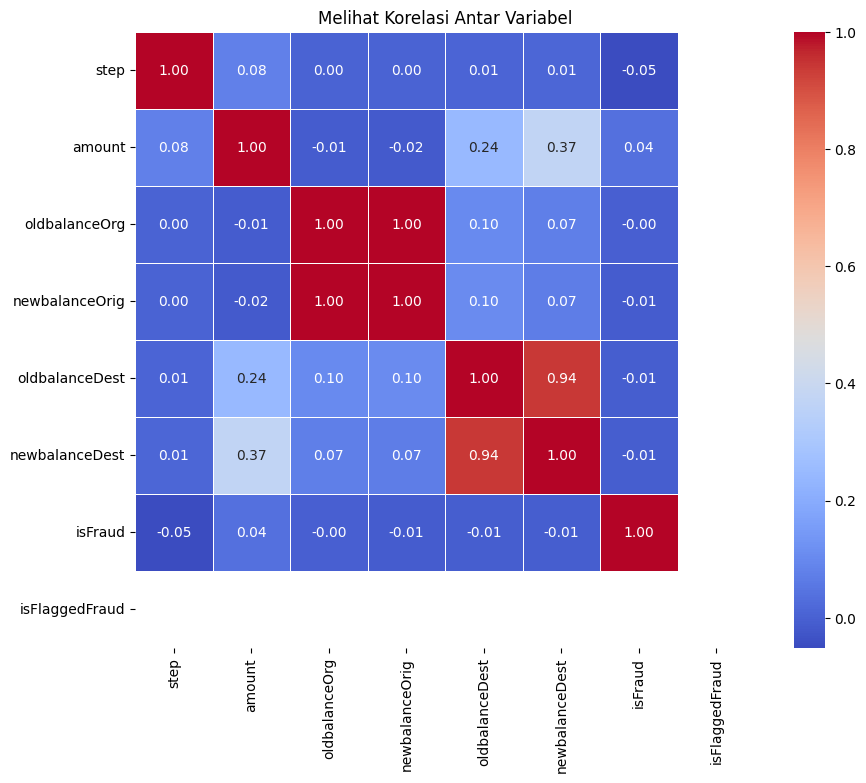

In [ ]:
# Korelasi antar variabel

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Melihat Korelasi Antar Variabel')
plt.show()

#### Ada 2 pasang feature yg memiliki korelasi tinggi yaitu Saldo Awal - Saldo Akhir akun Pengirim dan Saldo Awal - Saldo Akhir akun penerima, features ini tetap dipertahankan karena memberikan informasi yg berguna diantaranya melihat konsistensi dari suatu transaksi keuangan, jika saldo awal dan akhir ada perubahan yg signifikan hal tersebut menjadi indikator adanya kejanggalan pada transaksi keuangan dan tentunya adanya potensi transaksi terindikasi Fraud.

## Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
# Cek missing values per kolom

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Tidak ada missing values

In [ ]:
# Cek jumlah data duplicate

df.duplicated().sum()

0

### Tidak ada data yg terduplikat

In [ ]:
# Menghapus kolom 'nameOrig', dan 'nameDest' dan 'isFlaggedFraud' karena tidak memberikan
# informasi yg relevan dalam memprediksi suatu transaksi fraud atau tidak

df.drop(columns=["nameOrig"],inplace=True)
df.drop(columns=["nameDest"],inplace=True)
df.drop(columns=["isFlaggedFraud"],inplace=True)


#### Nama akun pengirim, nama akun penerima dan penanda fraud dihapus karena hanya berfungsi sebagai identifikasi dan tidak memberi informasi yang relevan terhadap deteksi transaksi yg terindikasi Fraud.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   oldbalanceOrg   101613 non-null  float64
 4   newbalanceOrig  101613 non-null  float64
 5   oldbalanceDest  101613 non-null  float64
 6   newbalanceDest  101613 non-null  float64
 7   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 6.2+ MB


In [ ]:
# one-hot encoding kolom 'type'

df = pd.get_dummies(df, columns=['type'])

#### Untuk mengkonversi variabel kategori/kualitatif menjadi representasi numerik (variabel biner) yang dapat digunakan oleh algoritma pembelajaran mesin.


In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   amount          101613 non-null  float64
 2   oldbalanceOrg   101613 non-null  float64
 3   newbalanceOrig  101613 non-null  float64
 4   oldbalanceDest  101613 non-null  float64
 5   newbalanceDest  101613 non-null  float64
 6   isFraud         101613 non-null  int64  
 7   type_CASH_IN    101613 non-null  uint8  
 8   type_CASH_OUT   101613 non-null  uint8  
 9   type_DEBIT      101613 non-null  uint8  
 10  type_PAYMENT    101613 non-null  uint8  
 11  type_TRANSFER   101613 non-null  uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 5.9 MB


## Pemodelan dan Evaluasi

## Decision Tree

In [ ]:
# Split data training dan testing

from sklearn.model_selection import train_test_split

X, y = df.drop('isFraud', axis=1), df['isFraud']

# Pembagian data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Membuat model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# Melatih model
tree_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = tree_model.predict(X_test)

# Menghitung probabilitas kelas positif
y_pred_proba = tree_model.predict_proba(X_test)[:, 1]

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menghitung dan menampilkan ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}\n')

# Menampilkan hasil
print(f'Accuracy: {accuracy:.4f}\n')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

ROC-AUC Score: 0.7996

Accuracy: 0.9989

Confusion Matrix:
[[20288    15]
 [    8    12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20303
           1       0.44      0.60      0.51        20

    accuracy                           1.00     20323
   macro avg       0.72      0.80      0.76     20323
weighted avg       1.00      1.00      1.00     20323



#### F1-score 100% untuk transaksi yg terindikasi tidak Fraud (kelas 0), model menunjukkan keseimbangan yg sempurna antara precision (ketepatan identifikasi yg tidak Fraud) dan recall (menemukan transaksi yg sebenarnya tidak Fraud).

#### F1-score untuk kelas positive (1) sebesar 51%, disini model dikatakan tidak terlalu buruk atau bisa dikatakan moderat dalam mendeteksi transaksi yg terindikasi Fraud, dan model dapat mengidentifikasi sejumlah transaksi fraud tanpa menghasilkan terlalu banyak False Positive atau False Negative.

## Random Forest

In [ ]:
# Split data training dan testing

from sklearn.model_selection import train_test_split

X, y = df.drop('isFraud', axis=1), df['isFraud']

# Pembagian data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred_rf = rf_model.predict(X_test)

# Melakukan prediksi probabilitas kelas positif pada set pengujian
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Menghitung ROC-AUC score untuk Random Forest
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
# Menampilkan ROC-AUC score untuk Random Forest
print(f'Random Forest ROC-AUC Score: {roc_auc_rf:.4f}\n')

# Menampilkan hasil Random Forest
print(f'Random Forest Accuracy: {accuracy_rf:.4f}\n')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('\nRandom Forest Classification Report:')
print(classification_rep_rf)

Random Forest ROC-AUC Score: 0.9991

Random Forest Accuracy: 0.9994

Random Forest Confusion Matrix:
[[20302     1]
 [   11     9]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20303
           1       0.90      0.45      0.60        20

    accuracy                           1.00     20323
   macro avg       0.95      0.72      0.80     20323
weighted avg       1.00      1.00      1.00     20323



#### F1-score 100% untuk transaksi yg terindikasi tidak Fraud (kelas 0), model menunjukkan keseimbangan yg sempurna antara precision (ketepatan identifikasi yg tidak Fraud) dan recall (menemukan transaksi yg sebenarnya tidak Fraud).

#### F1-score 60% untuk transaksi yg terindikasi Fraud (kelas 1), menunjukkan bahwa model memiliki kemampuan yang baik untuk mengurangi false positive (transaksi yg diprediksi Fraud tetapi sebenarnya tidak) ditunjukkan dengan hasil Precision 90% dan false negative (transaksi yg sebenarnya terindikasi Fraud tetapi tidak terdeksi) ditunjukkan dengan hasil Recall yang agak buruk 45% secara seimbang.

## XGBoost (Extreme Gradient Boosting)

In [ ]:
# Split data training dan testing

from sklearn.model_selection import train_test_split

X, y = df.drop('isFraud', axis=1), df['isFraud']

# Pembagian data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Membuat model XGBoost
xgb_model = XGBClassifier(random_state=42)

# Melatih model
xgb_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred_xgb = xgb_model.predict(X_test)

# Melakukan prediksi probabilitas kelas positif pada set pengujian
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluasi performa model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Menghitung ROC-AUC score untuk XGBoost
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Menampilkan ROC-AUC score untuk XGBoost
print(f'XGBoost ROC-AUC Score: {roc_auc_xgb:.4f}\n')

# Menampilkan hasil XGBoost
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}\n')
print('XGBoost Confusion Matrix:')
print(conf_matrix_xgb)
print('\nXGBoost Classification Report:')
print(classification_rep_xgb)

XGBoost ROC-AUC Score: 0.9997

XGBoost Accuracy: 0.9997

XGBoost Confusion Matrix:
[[20302     1]
 [    5    15]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20303
           1       0.94      0.75      0.83        20

    accuracy                           1.00     20323
   macro avg       0.97      0.87      0.92     20323
weighted avg       1.00      1.00      1.00     20323



#### F1-score 100% untuk transaksi yg terindikasi tidak Fraud (kelas 0), model menunjukkan keseimbangan yg sempurna antara precision (ketepatan identifikasi yg tidak Fraud) dan recall (menemukan transaksi yg sebenarnya tidak Fraud).

#### F1-score 83% untuk transaksi yg terindikasi Fraud (kelas 1), menunjukkan bahwa model memiliki kemampuan yang baik untuk mengurangi false positive (transaksi yg diprediksi Fraud tetapi sebenarnya tidak) ditunjukkan dengan hasil Precision 94% dan false negative (transaksi yg sebenarnya terindikasi Fraud tetapi tidak terdeksi) ditunjukkan dengan hasil Recall 75% secara seimbang.

## Hyperparameter Tuning pada Model Terbaik

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Membuat model XGBoost
model = XGBClassifier(random_state=42)

# Menggunakan K-Fold Cross-Validation dengan 5 fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')  # Ganti 'recall' dengan metrik yang Anda pilih

# Menampilkan hasil cross-validation
print('Cross-Validation Scores:', scores)
print('Mean Recall:', scores.mean())

Cross-Validation Scores: [0.68421053 0.84210526 0.57894737 0.26315789 0.55      ]
Mean Recall: 0.5836842105263157


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Definisikan ruang parameter
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

# Inisialisasi model
model = XGBClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Tampilkan Hasil Penyetelan Parameter
print('Best Parameters:', grid_result.best_params_)

# Evaluasi Model Terbaik
best_model = grid_result.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Tampilkan Evaluasi Model Terbaik
print('Best Model Accuracy:', accuracy_score(y_test, y_pred_best))
print('Best Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))
print('Best Model Classification Report:')
print(classification_report(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best Model Accuracy: 0.999753973330709
Best Model Confusion Matrix:
[[20302     1]
 [    4    16]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20303
           1       0.94      0.80      0.86        20

    accuracy                           1.00     20323
   macro avg       0.97      0.90      0.93     20323
weighted avg       1.00      1.00      1.00     20323



#### Hasil F1-score meningkat menjadi 86% untuk transaksi yg terindikasi Fraud (kelas 1), menunjukkan bahwa model memiliki kemampuan yang baik untuk mengurangi false positive (transaksi yg diprediksi Fraud tetapi sebenarnya tidak) ditunjukkan dengan hasil Precision 94% dan false negative (transaksi yg sebenarnya terindikasi Fraud tetapi tidak terdeksi) ditunjukkan dengan hasil Recall 80% secara seimbang.

In [ ]:
from sklearn.metrics import roc_auc_score

# Menggunakan model terbaik yang telah di-setel parameter
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Menghitung nilai ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

print('ROC-AUC Score:', roc_auc)

ROC-AUC Score: 0.999793134019603


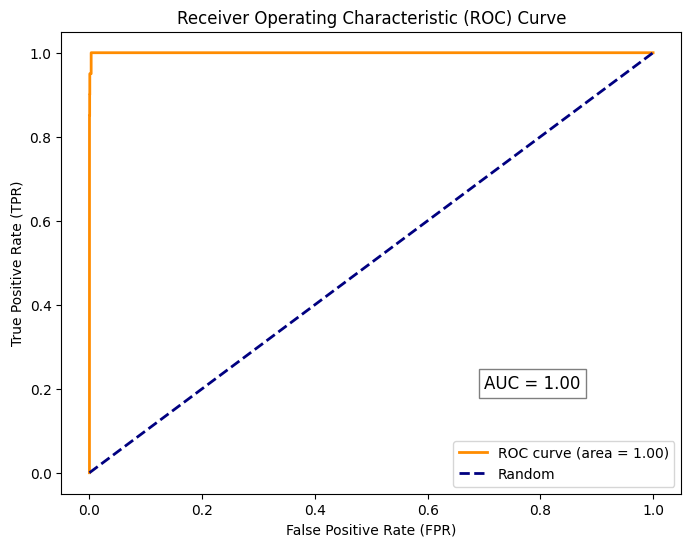

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Menghitung nilai False Positive Rate (FPR), True Positive Rate (TPR), dan Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)

# Menghitung Area Under the Curve (AUC) untuk ROC
roc_auc = auc(fpr, tpr)

# Plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.text(0.7, 0.2, 'AUC = {:.2f}'.format(roc_auc), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

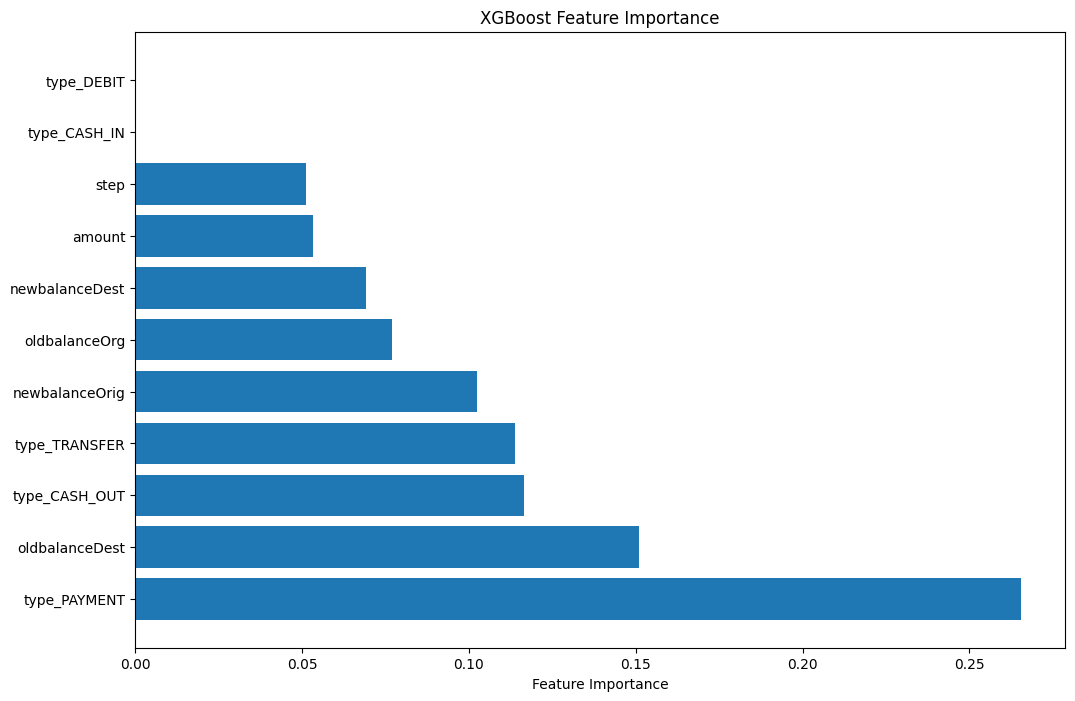

In [ ]:
# Membuat objek model XGBoost
import xgboost as xgb
model = xgb.XGBClassifier()

# Melatih model pada data
model.fit(X_train, y_train)

# Mendapatkan feature importances
feature_importances = model.feature_importances_

# Membuat DataFrame untuk memudahkan visualisasi
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Mengurutkan fitur berdasarkan tingkat penting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan plot bar untuk visualisasi feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

#### Feature yang paling berpengaruh yaitu type transaksi Payment